In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# read LRG data arrays

data_raLRG = np.load('/Users/mtownsend/anaconda/Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

data_decLRG = np.load('/Users/mtownsend/anaconda/Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

data_zLRG = np.load('/Users/mtownsend/anaconda/Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

data_gmagLRG = np.load('/Users/mtownsend/anaconda/Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

data_rmagLRG = np.load('/Users/mtownsend/anaconda/Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

data_zmagLRG = np.load('/Users/mtownsend/anaconda/Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)
print(zmagLRG.min())
print(zmagLRG.max())

print('----')

data_grcolorLRG = np.load('/Users/mtownsend/anaconda/Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

data_rzcolorLRG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)


(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
15.818878
21.957382
----
(1823,)
----
(1823,)


In [3]:
# read BKG data arrays

data_raBKG = np.load('/Users/mtownsend/anaconda/Data/ra_BKG_v2.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

data_decBKG = np.load('/Users/mtownsend/anaconda/Data/dec_BKG_v2.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

data_gmagBKG = np.load('/Users/mtownsend/anaconda/Data/gmag_BKG_v2.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

data_rmagBKG = np.load('/Users/mtownsend/anaconda/Data/rmag_BKG_v2.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

data_zmagBKG = np.load('/Users/mtownsend/anaconda/Data/zmag_BKG_v2.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')


data_grcolorBKG = np.load('/Users/mtownsend/anaconda/Data/grcolor_BKG_v2.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

data_rzcolorBKG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_BKG_v2.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)


(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)


In [4]:
ra_total = np.concatenate([raLRG, raBKG])
dec_total = np.concatenate([decLRG, decBKG])
gmag_total = np.concatenate([gmagLRG, gmagBKG])
rmag_total = np.concatenate([rmagLRG, rmagBKG])
zmag_total = np.concatenate([zmagLRG, zmagBKG])
rzcolor_total = np.concatenate([rzcolorLRG, rzcolorBKG])
grcolor_total = np.concatenate([grcolorLRG, grcolorBKG])

print(len(ra_total))

1296299


In [6]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(zLRG)

print("end cosmoCalc")

end cosmoCalc


In [7]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))

edges = np.array([rz_edges, gr_edges, zmag_edges])
print(edges.shape)

H1, nouse_edges = np.histogramdd((rzcolor_total, grcolor_total, zmag_total), bins=(rz_edges, gr_edges, zmag_edges), density=False)

print(H1.shape)

<class 'numpy.ndarray'>
(3, 50)
(49, 49, 49)


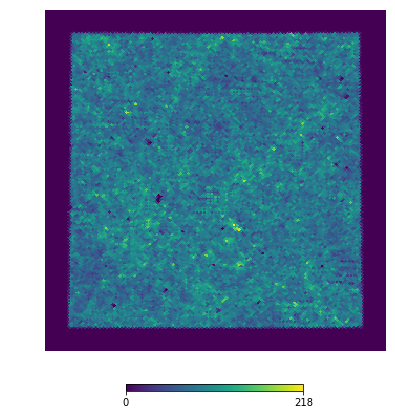

length phi:  1296299


In [5]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_total)):
    theta.append(np.radians(90. - dec_total[i]))
    phi.append(np.radians(ra_total[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=325, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)

In [22]:
# cone search for all sources around each LRG out to 0.5 deg

from astropy import units as u
from astropy_healpix import HEALPix
import pandas as pd
import numpy as np
import healpy as hpy

hp = HEALPix(nside=nside, order='nested')
dist = 0.5
    
radius_pix = []
for i in range(len(raLRG)):
    radius_pix.append(hp.cone_search_lonlat(raLRG[i] * u.deg, decLRG[i] * u.deg, radius=dist * u.deg))

# print(len(radius_pix[1]))    
    
pixnum_index = pd.Index(pixnums)
a = []
indices = []

for j in range(len(radius_pix)):
    good_keys = np.unique(pixnum_index.intersection(radius_pix[j]))
    for i in range(len(good_keys)):
        #         print(j)
        temp = (pixnum_index.get_loc(good_keys[i]))
        #         print(temp)
        a.append(np.where(temp == True))
    #         print("end")
    array = np.concatenate(a, axis=None)
    sort_array = np.sort(array)
    indices.append(sort_array)
    a = []
    
print(len(indices))

1823


In [43]:
# there are 1823 indices arrays (one for each LRG)
# the length of each indices array is the number of galaxies within 0.5 deg of the LRG
# need to now divvy up my LRGs by redshift and compare Nsat to the number density

# print(indices[1822][0:3])
# print(indices[1])
# print(indices[1][24365])

ind_arr = np.array(indices)
# print(ind_arr[0])

# print(len(indices[0]))
# print(len(indices[1]))
# print(len(indices[2]))
# print(len(indices))

indices35 = ind_arr[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
indices05 = ind_arr[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
indices65 = ind_arr[np.where((zLRG >= 0.5) & (zLRG <= 0.65))]

# print(len(indices35))
# print(len(indices05))
# print(len(indices65))


# lowz
data_Nsat_low = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_low-EDR.npz')
Nsat35_low = data_Nsat_low['masked_Nsat_low35']

# midz
data_Nsat_mid = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_mid-EDR.npz')
Nsat35_mid = data_Nsat_mid['masked_Nsat_mid35']
Nsat05_mid = data_Nsat_mid['masked_Nsat_mid05']

# highz
data_Nsat_high = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_high-EDR.npz')
Nsat35_high = data_Nsat_high['masked_Nsat_high35']
Nsat05_high = data_Nsat_high['masked_Nsat_high05']
Nsat65_high = data_Nsat_high['masked_Nsat_high65']


In [44]:
# create number density arrays for each redshift bin

Ndense35 = []
for i in range(len(indices35)):
    temp35 = len(indices35[i])
    Ndense35.append(temp35)
    
print(len(Ndense35))


Ndense05 = []
for i in range(len(indices05)):
    temp05 = len(indices05[i])
    Ndense05.append(temp05)
    
print(len(Ndense05))


Ndense65 = []
for i in range(len(indices65)):
    temp65 = len(indices65[i])
    Ndense65.append(temp65)
    
print(len(Ndense65))


# sum Nsat

# lowz
sumsat35_low = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat35_low)):
    sumsat35_low.append(np.sum(Nsat35_low[i]))
    

    
# midz
sumsat35_mid = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat35_mid)):
    sumsat35_mid.append(np.sum(Nsat35_mid[i]))
    
    
sumsat05_mid = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat05_mid)):
    sumsat05_mid.append(np.sum(Nsat05_mid[i]))
    
    
    
# highz
sumsat35_high = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat35_high)):
    sumsat35_high.append(np.sum(Nsat35_high[i]))
    
    
sumsat05_high = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat05_high)):
    sumsat05_high.append(np.sum(Nsat05_high[i]))
    

sumsat65_high = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat65_high)):
    sumsat65_high.append(np.sum(Nsat65_high[i]))


309
617
897


In [47]:
# # read in files with the number of satellites for 80, 90, and 99 percentiles for each LRG redshift/luminosity bin

# low
plow = np.load('/Users/mtownsend/Documents/LRG_Data/percentiles_low-EDR.npz')
plow35 = plow['low_p35']

# mid
pmid = np.load('/Users/mtownsend/Documents/LRG_Data/percentiles_mid-EDR.npz')
pmid35 = pmid['mid_p35']
pmid05 = pmid['mid_p05']

# high
phigh = np.load('/Users/mtownsend/Documents/LRG_Data/percentiles_high-EDR.npz')
phigh35 = phigh['high_p35']
phigh05 = phigh['high_p05']
phigh65 = phigh['high_p65']

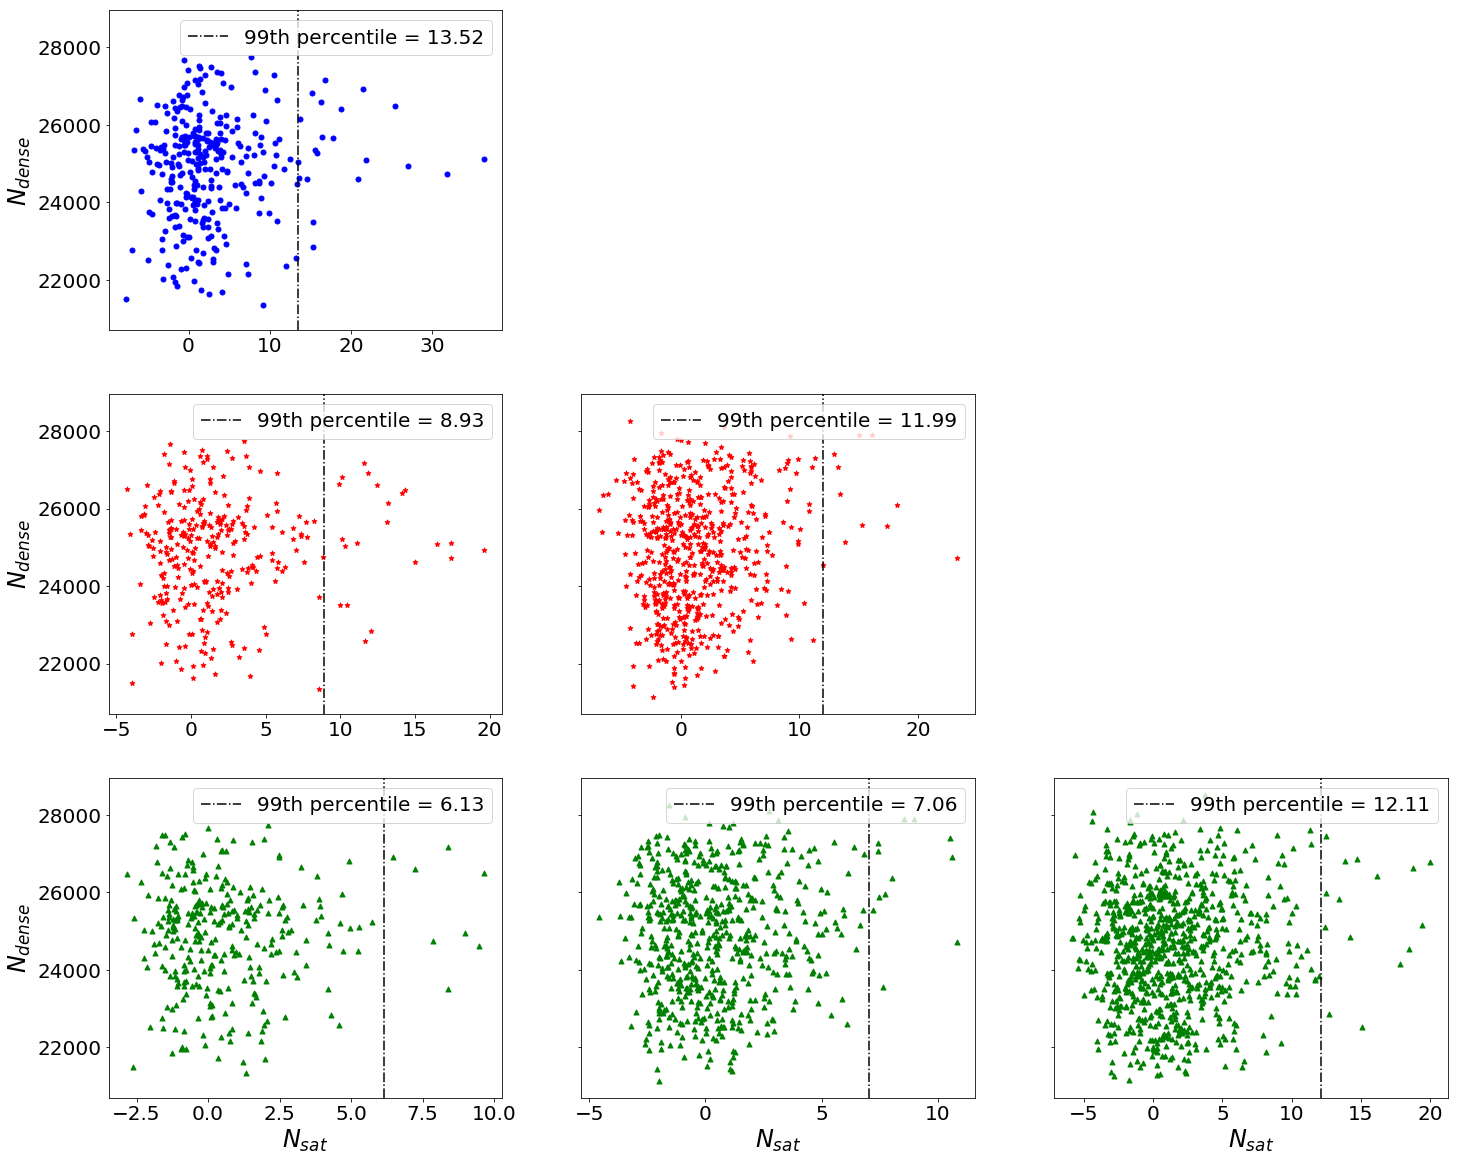

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (24,20), sharey=True)

# axes[0,0].text(x = 0.275, y = 40, s = "0.2 < z < 0.35", ha = "center", fontsize=24)
# axes[0,0].text(x = 0.14, y = 15, s = "log$_{10}$(L) = 9.27", va = "center", rotation='vertical', fontsize=24)

axes[0,0].scatter(sumsat35_low, Ndense35, color='blue', marker='o', s=25)
axes[0,0].axvline(x=plow35[2], color='black', linestyle= '-.', label='99th percentile = {}'.format(round(plow35[2],2)))
axes[0,0].legend(fontsize='20', markerscale=3, loc='upper right')
# ax1.text(0.32, 14.2, '99th percentile = {}'.format(round(plow35[2],2), fontsize=100))
# axes[0,0].set_xlabel('redshift', fontsize=45)
axes[0,0].set_ylabel('$N_{dense}$', fontsize=24)
axes[0,0].tick_params(axis='both', which='major', labelsize=20)

axes[0,1].remove()
axes[0,2].remove()



# axes[1,0].text(x = 0.14, y = 15, s = "log$_{10}$(L) = 9.58", va = "center", rotation='vertical', fontsize=24)
axes[1,0].scatter(sumsat35_mid, Ndense35, color='red', marker='*', s=25)
axes[1,0].axvline(x=pmid35[2], color='black', linestyle= '-.', label='99th percentile = {}'.format(round(pmid35[2],2)))
axes[1,0].legend(fontsize='20', markerscale=3, loc='upper right')
# ax2.text(0.32, 9.33, '99th percentile = {}'.format(round(pmid35[2],2), fontsize=24))
# axes[1,0].set_xlabel('redshift', fontsize=35)
axes[1,0].set_ylabel('$N_{dense}$', fontsize=24)
axes[1,0].tick_params(axis='both', which='major', labelsize=20)

# axes[1,1].text(x = 0.425, y = 40, s = "0.35 < z < 0.5", ha = "center", fontsize=24)
axes[1,1].scatter(sumsat05_mid, Ndense05, color='red', marker='*', s=25)
axes[1,1].axvline(x=pmid05[2], color='black', linestyle= '-.', label='99th percentile = {}'.format(round(pmid05[2],2)))
axes[1,1].legend(fontsize='20', markerscale=3, loc='upper right')
# ax3.text(0.32, 12.49, '99th percentile = {}'.format(round(pmid05[2],2), fontsize=24))
# axes[1,1].set_xlabel('redshift', fontsize=35)
# axes[1,1].set_ylabel('satellite numbers', fontsize=45)
axes[1,1].tick_params(axis='both', which='major', labelsize=20)

axes[1,2].remove()



# axes[2,0].text(x = 0.14, y = 15, s = "log$_{10}$(L) = 9.85", va = "center", rotation='vertical', fontsize=24)
axes[2,0].scatter(sumsat35_high, Ndense35, color='green', marker='^', s=25)
axes[2,0].axvline(x=phigh35[2], color='black', linestyle= '-.', label='99th percentile = {}'.format(round(phigh35[2],2)))
axes[2,0].legend(fontsize='20', markerscale=3, loc='upper right')
# ax4.text(0.32, 6.3, '99th percentile = {}'.format(round(phigh35[2],2), fontsize=24))
axes[2,0].set_xlabel('$N_{sat}$', fontsize=24)
axes[2,0].set_ylabel('$N_{dense}$', fontsize=24)
axes[2,0].tick_params(axis='both', which='major', labelsize=20)
# plt.show()

axes[2,1].scatter(sumsat05_high, Ndense05, color='green', marker='^', s=25)
axes[2,1].axvline(x=phigh05[2], color='black', linestyle= '-.', label='99th percentile = {}'.format(round(phigh05[2],2)))
axes[2,1].legend(fontsize='20', markerscale=3, loc='upper right')
# ax5.text(0.32, 7.2, '99th percentile = {}'.format(round(phigh05[2],2), fontsize=24))
axes[2,1].set_xlabel('$N_{sat}$', fontsize=24)
# axes[2,1].set_ylabel('satellite numbers', fontsize=45)
axes[2,1].tick_params(axis='both', which='major', labelsize=20)
# plt.show()

# axes[2,2].text(x = 0.575, y = 40, s = "0.5 < z < 0.65", ha = "center", fontsize=24)
axes[2,2].scatter(sumsat65_high, Ndense65, color='green', marker='^', s=25)
axes[2,2].axvline(x=phigh65[2], color='black', linestyle= '-.', label='99th percentile = {}'.format(round(phigh65[2],2)))
axes[2,2].legend(fontsize='20', markerscale=3, loc='upper right')
# ax6.text(0.32, 12.41, '99th percentile = {}'.format(round(phigh65[2],2), fontsize=24))
axes[2,2].set_xlabel('$N_{sat}$', fontsize=24)
# axes[2,2].set_ylabel('satellite numbers', fontsize=45)
axes[2,2].tick_params(axis='both', which='major', labelsize=20)
# plt.show()

# plt.xlabel('redshift', fontsize=15)
# plt.ylabel('satellite numbers', fontsize=15)
# plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('/Users/mtownsend/Desktop/PaperPlots/density-test.pdf')

plt.show()




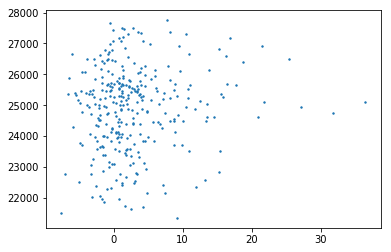

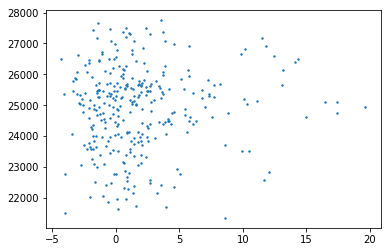

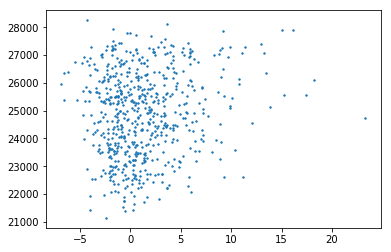

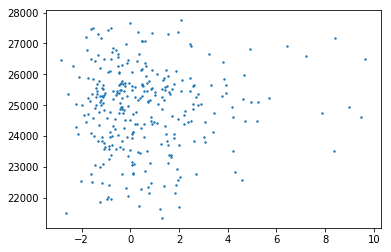

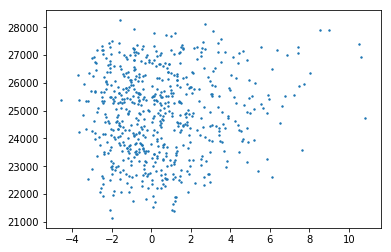

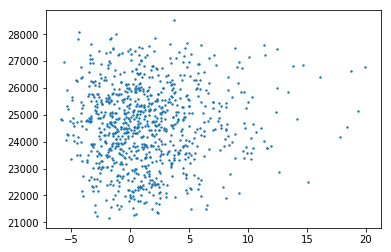

In [46]:
plt.scatter(sumsat35_low, Ndense35, s=2)
plt.show()

plt.scatter(sumsat35_mid, Ndense35, s=2)
plt.show()

plt.scatter(sumsat05_mid, Ndense05, s=2)
plt.show()

plt.scatter(sumsat35_high, Ndense35, s=2)
plt.show()

plt.scatter(sumsat05_high, Ndense05, s=2)
plt.show()

plt.scatter(sumsat65_high, Ndense65, s=2)
plt.show()